In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import os
import sys
import numpy as np # linear algebra
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob as glob
from sklearn import model_selection, preprocessing, ensemble, metrics, feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import image
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from scipy import stats
from datetime import datetime
from PIL import Image
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v

In [2]:
# set train_df as the training dataframe
train_df = pd.read_json("train.json")

# look at the first 25 rows of training data
train_df.head(25)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
16,1.0,3,300d27d8ba2adbcbc8c6f2bcbc1c6f9d,2016-06-28 05:59:06,This spectacular converted 3 bed apartment all...,East 16th Street,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",40.7348,7226687,-73.9865,30a7951cfc21240e8c46b2d079d292e5,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street,low
18,2.0,3,0d01cabe55fa5192cdbcabd5c585c1ea,2016-06-08 06:21:36,AMAZING DEAL!! BRAND NEW RENOVATIONS IN THIS H...,East 13th Street,"[Fireplace, Laundry in Unit, Dishwasher, Hardw...",40.7302,7126989,-73.9826,9f39caedae295bf81e67463e6fd0af40,[https://photos.renthop.com/2/7126989_a74ab3da...,6000,410 East 13th Street,low
19,1.0,0,d48767c37a934daaf0bbb0e58c755d0c,2016-06-05 05:28:22,No Fee Large Renovated Sun Splashed Studio. Wa...,York Avenue,"[Elevator, Laundry in Building, Dishwasher, Ha...",40.7769,7114138,-73.9467,9cbfa7a31ae9dfba70b4383636d99788,[https://photos.renthop.com/2/7114138_68d035c3...,1945,1661 York Avenue,high
23,0.0,1,d1ca33a2853e64fad6e4009d5d5d168f,2016-06-09 04:42:03,Extra large one bedroom apartment located in P...,E 19 Street,[Hardwood Floors],40.7346,7131094,-73.9811,b89e62bf8cdc98e9fb8b97d9bc627197,[https://photos.renthop.com/2/7131094_2117d8a9...,2435,346 E 19 Street,low
32,3.0,3,5f35dc2f0191baf109221752e6ee0c48,2016-06-28 03:26:18,Listed: 06/26/16<br /><br />Available:...,Hicks Street,"[Cats Allowed, Dogs Allowed]",40.6990,7224815,-73.9943,d5d246c9d9d4e7079e5a0fc962d2f1a7,[https://photos.renthop.com/2/7224815_8ff8a811...,6850,94 Hicks Street,low


In [3]:
test_df = pd.read_json("test.json")
train_df.info()
print("# of train rows : ", train_df.shape[0])
print("# of test rows : ", test_df.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 4.3+ MB
# of train rows :  49352
# of test rows :  746

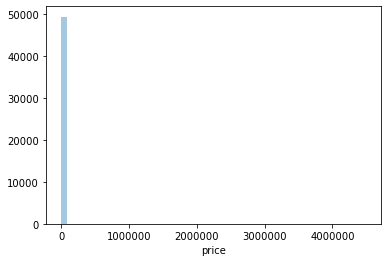

In [4]:
# Plot histograms for the following numeric columns: Price, Latitude & Longitude
# None of the histograms are very useful due to outliers

sns.distplot(train_df['price'], kde = False)

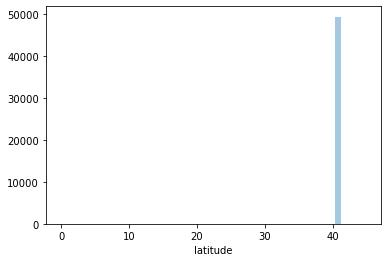

In [5]:
sns.distplot(train_df['latitude'], kde = False)

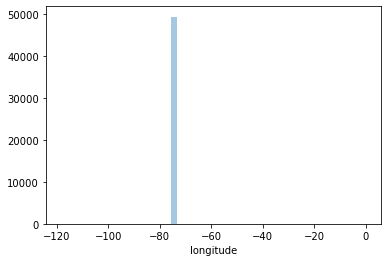

In [6]:
sns.distplot(train_df['longitude'], kde = False)

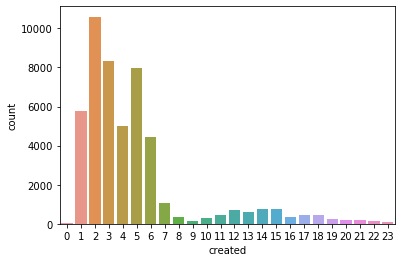

In [7]:
# Plot hour-wise listing trend and find out the top 5 busiest hours of postings

train_df['created'] = pd.to_datetime(train_df['created'])

sns.countplot(train_df.created.dt.hour)

# the five busiest hours of postings are (in decreasing order): 2 AM, 3 AM, 5 AM, 2 AM, 4 AM

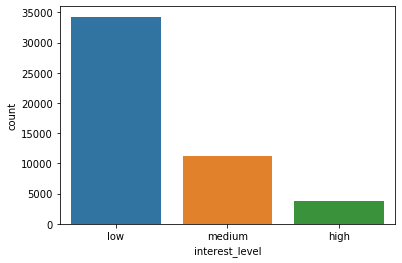

In [8]:
# Visualization to show the proportion of target variable values

sns.countplot(train_df['interest_level'], order=['low','medium','high'])

# Most properties have an interest level of low, which makes sense. The properties with higher interest levels
# will be sold off first

In [9]:
# !!!Find the number of missing values in each variable
# bathrooms	bedrooms	building_id	created	description	display_address	features	latitude	listing_id	longitude	manager_id	photos	price	street_address	interest_level
# number of null values in each variable
latitude_count = 0
longitude_count = 0
price_count = 0
bedroom_count = 0
bathroom_count = 0
building_id_count = 0
created_count = 0
display_address_count = 0
description_count = 0
features_count = 0;
manager_id_count = 0
photos_count = 0
street_address_count = 0
interest_level_count = 0
listing_id_count = 0;

print ("TOTAL MISSING VALUES")
median = train_df['latitude'].median()
for b in train_df['latitude']:
    if b == 0:
        latitude_count += 1
        b = median
print ("Latitude : ", latitude_count)

for b in train_df['listing_id']:
    if b == 0:
        listing_id_count += 1
print ("listing_id ", listing_id_count)

# bedroom and bathroom can be zero!!! Have to fix these two
for b in train_df['bedrooms']:
    if b == 0 or isinstance(b, int) == False:
        bedroom_count += 1
        #print(b)
print ("bedrooms", bedroom_count)

for b in train_df['bathrooms']:
    if b == 0 or isinstance(b, float) == False:
        bathroom_count += 1
        #print(b)
print ("bathrooms", bathroom_count)
#

median = train_df['longitude'].median()
for b in train_df['longitude']:
    if b == 0:
        longitude_count += 1
        b = median
print ("longitude", longitude_count)

median = train_df['price'].median()
for b in train_df['price']:
    if b == 0:
        price_count += 1
        b = median
print ("price", price_count)

for b in train_df['building_id']:
    if b == "":
        building_id_count += 1
print ("building_id", building_id_count)


#length of date format is 19
for b in train_df['created']:
    if b == "":
        created_count += 1
        #print(b)
print ("created", created_count)

for b in train_df['description']:
    if b == "" or b is None or len(b) < 4: # shows irrelevant data for len < 4
        description_count += 1
        #print(b)
print ("description", description_count)

for b in train_df['display_address']:
    if b == "" or len(b) < 3: # displays irrelevant value for len < 3
        #print(b)
        display_address_count += 1
        #print(b)
print ("display_address", display_address_count)

for b in train_df['features']:
    if b == "":
        features_count += 1
print ("features", features_count)

for b in train_df['manager_id']:
    if b == "" or b is None:
        manager_id_count += 1
        #print(b)
print ("manager_id", manager_id_count)

for b in train_df['photos']:
    if b == "" or b is None:
        photos_count += 1
        #print(b)
print ("photos", photos_count)

for b in train_df['street_address']:
    if b == "" or len(b) < 4: # Found garbage value "hi5"
        #print(b)
        street_address_count += 1
        #print(b)
print ("street_address", street_address_count)

for b in train_df['interest_level']:
    if b == "" or b is None:
        interest_level_count += 1
        #print(b)
print ("interest_level", interest_level_count)

#for b in train_df['features']:
 #   print(b)


TOTAL MISSING VALUES
Latitude :  12
listing_id  0
bedrooms 9475
bathrooms 313
longitude 12
price 0
building_id 0
created 0
description 1686
display_address 137
features 0
manager_id 0
photos 0
street_address 11
interest_level 0


In [10]:
# Find out the number of outliers in each variable

z = np.abs(stats.zscore(train_df[['bedrooms', 'bathrooms', 'latitude', 'longitude', 'price']]))

threshold = 3

outliers = np.where(z>threshold)
outliersRow = outliers[0]
outliersCol = outliers[1]

bedrooms_outliers = 0 
bathrooms_outliers = 0
latitude_outliers = 0
longitude_outliers = 0 
price_outliers = 0

for val in outliersCol:
    if val == 0:
        bedrooms_outliers += 1
    elif val == 1:
        bathrooms_outliers += 1
    elif val == 2:
        latitude_outliers += 1
    elif val == 3:
        longitude_outliers += 1
    else:
        price_outliers += 1

print('TOTAL OUTLIERS')
print('bedrooms : ', bedrooms_outliers)
print('bathrooms : ', bathrooms_outliers)
print('latitude : ', latitude_outliers)
print('longitude : ', longitude_outliers)
print('price : ', price_outliers)



TOTAL OUTLIERS
bedrooms :  297
bathrooms :  1035
latitude :  18
longitude :  16
price :  10


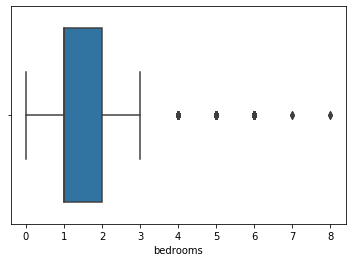

In [11]:
# Plot visualizations to demonstrate outliers

sns.boxplot(x = train_df['bedrooms'])

True


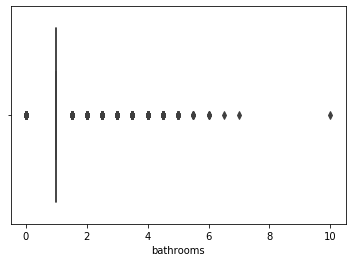

In [12]:
temp = "6"
print(temp.isdigit())
sns.boxplot(x = train_df['bathrooms'])

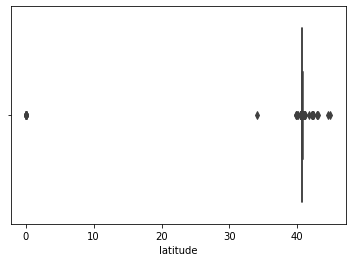

In [13]:
sns.boxplot(x = train_df['latitude'])

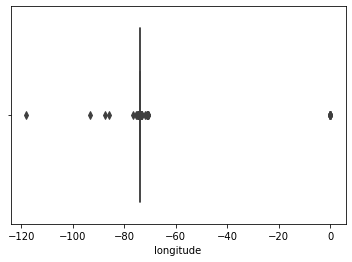

In [14]:
sns.boxplot(x = train_df['longitude'])

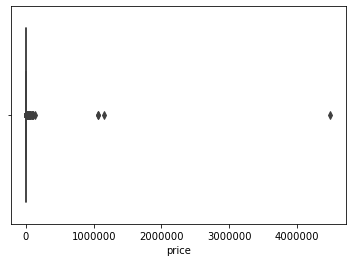

In [15]:
sns.boxplot(x = train_df['price'])

In [16]:
# Find outliers using Z-score
# look through latitude, longitude, price

z = np.abs(stats.zscore(train_df[['latitude', 'longitude', 'price']]))
threshold = 3

# Remove outliers from these columns with a z-score greater than 3
train_df_o = train_df[(z<threshold).all(axis=1)]

z = np.abs(stats.zscore(train_df_o[['bedrooms', 'bathrooms']]))
# Remove outliers from bedrooms and bathrooms with very high z-score
# we do this because these attributes are integers and highly concentrated. i.e. most properties only have 1-2 bedrooms and 1 bathroom
# therefore, we only need to get rid of the farthest outliers to get good results
train_df_o = train_df_o[(z<5).all(axis=1)]

print(train_df.shape)
print(train_df_o.shape)

train_df = train_df_o

(49352, 15)
(49105, 15)


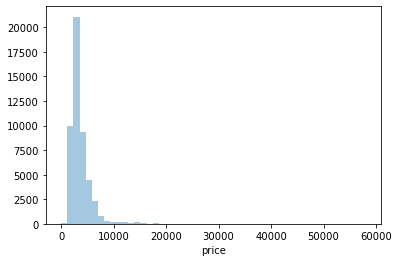

In [17]:
# Plot histograms for the following numeric columns:
# Price

sns.distplot(train_df['price'], kde = False)

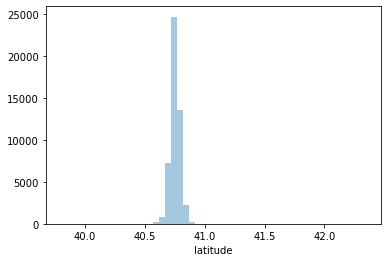

In [18]:
# Latitude

sns.distplot(train_df['latitude'], kde = False)

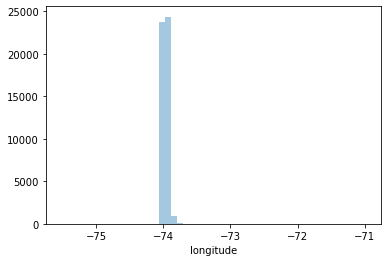

In [19]:
#Longitide

sns.distplot(train_df['longitude'], kde = False)

In [20]:
# Extract features from the images and transform it into data that’s ready to be used in the model for classification.

# Feature 1: Grayscale pixel values      ~~~ Commented out due to memory issues ~~~
#grayscale_feat_list = []
#for filename in glob.glob('images_sample/*/*.jpg'):
#    img = imread(filename, as_gray=True)
#    imgFeature = np.reshape(img, (img.shape[0]*img.shape[1]))    
#    grayscale_feat_list.append(imgFeature)


# Feature 2: Channel mean pixel values
#mean_pix_list = []
#for filename in glob.glob('images_sample/*/*.jpg'):
#    colorImg = imread(filename)
#    print(filename)
#    feat_matrix = np.zeros((colorImg.shape[0], colorImg.shape[1]))
#    for i in range(0, colorImg.shape[0]):
#        for j in range(0, colorImg.shape[1]):
#                feat_matrix[i][j] = ((int(colorImg[i,j,0]) + int(colorImg[i,j,1]) + int(colorImg[i,j,2]))/3)
#    feature = np.reshape(feat_matrix, (colorImg.shape[0]*colorImg.shape[1]))
#    mean_pix_list.append(feature)


In [21]:
# Drop duplicate features

train_df['features'] = train_df.loc[:,'features'].apply(lambda x: ' '.join(x))
train_df['photos'] = train_df.loc[:,'photos'].apply(lambda x: ' '.join(x))
test_df['features'] = test_df.loc[:,'features'].apply(lambda x: ' '.join(x))
test_df['photos'] = test_df.loc[:,'photos'].apply(lambda x: ' '.join(x))
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [22]:
# Extract features from the text data and transform it into data that's ready to be used in the model for classification

# number of photos
train_df['num_photos'] = train_df['photos'].apply(len)
test_df['num_photos'] = test_df['photos'].apply(len)

# number of features
train_df['num_features'] = train_df['features'].apply(len)
test_df['num_features'] = test_df['features'].apply(len)

# get hour, day, month, year
train_df['hour'] = train_df.created.dt.hour
train_df['day'] = train_df.created.dt.day
train_df['month'] = train_df.created.dt.month
train_df['year'] = train_df.created.dt.year

test_df['created'] = pd.to_datetime(test_df['created'])
test_df['hour'] = test_df.created.dt.hour
test_df['day'] = test_df.created.dt.day
test_df['month'] = test_df.created.dt.month
test_df['year'] = test_df.created.dt.year

train_df["num_description_words"] = train_df["description"].apply(lambda x: len(x.split(" ")))
test_df["num_description_words"] = test_df["description"].apply(lambda x: len(x.split(" ")))

# use label encoder to normalize labels
#categorical = ["display_address", "manager_id", "building_id", "street_address"]
#for f in categorical:
#    le = preprocessing.LabelEncoder()
#    le.fit(list(train_df[f].values) + list(test_df[f].values))
#    train_df[f] = le.transform(list(train_df[f].values))
#    test_df[f] = le.transform(list(test_df[f].values))

# SVM additional features
svm_train = train_df
svm_test = test_df

# drop non-numerical columns
train_df = train_df.drop(['created','description','features','photos', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)
test_df = test_df.drop(['created','description','features','photos', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)

train_df.info()
svm_train = svm_train.drop(['created','description','features', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)
svm_test = svm_test.drop(['created','description','features', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)
svm_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49105 entries, 4 to 124009
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bathrooms              49105 non-null  float64
 1   bedrooms               49105 non-null  int64  
 2   latitude               49105 non-null  float64
 3   listing_id             49105 non-null  int64  
 4   longitude              49105 non-null  float64
 5   price                  49105 non-null  int64  
 6   interest_level         49105 non-null  object 
 7   num_photos             49105 non-null  int64  
 8   num_features           49105 non-null  int64  
 9   hour                   49105 non-null  int64  
 10  day                    49105 non-null  int64  
 11  month                  49105 non-null  int64  
 12  year                   49105 non-null  int64  
 13  num_description_words  49105 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 5.4

In [23]:
# Need to put all columns except interest_level into X
# Need to put interest_level into Y

RFE_X = train_df.loc[:, train_df.columns != 'interest_level']
RFE_y = train_df.loc[:, train_df.columns == 'interest_level']
RFE_y = RFE_y.values.ravel()


In [24]:
# Recursive feature elimination

RFEmodel = LogisticRegression(solver = 'lbfgs', multi_class='auto', max_iter=10000)
rfe = feature_selection.RFECV(RFEmodel, cv=3)
rfe = rfe.fit(RFE_X, RFE_y)
print(rfe.support_)
print(rfe.ranking_)

# SVM Label Encoding for photo data
le = preprocessing.LabelEncoder()
for column_name in svm_train.columns:
    if svm_train[column_name].dtype == object:
        svm_train[column_name] = le.fit_transform(svm_train[column_name])
    else:
        pass
    
svm_RFE_X = svm_train.loc[:, svm_train.columns != 'interest_level']
svm_RFE_y = svm_train.loc[:, svm_train.columns == 'interest_level']
svm_RFE_y = svm_RFE_y.values.ravel()

rfe = rfe.fit(svm_RFE_X, svm_RFE_y)

# these results suggest that we should:
# keep - listing_id, price, num_photos, num_features, hour, day, year, num_description_words
# then in order of importance - bedrooms, bathrooms, longitude, latitude, month

[False False False  True False  True  True  True  True  True False  True
  True]
[3 2 5 1 4 1 1 1 1 1 6 1 1]


In [25]:
# Remove least important feature
train_df = train_df.drop(['month'], axis = 1)
test_df = test_df.drop(['month'], axis = 1)

svm_train = svm_train.drop(['month'], axis = 1)
svm_test = svm_test.drop(['month'], axis = 1)

In [26]:
X = train_df.loc[:, train_df.columns != 'interest_level']
y = train_df.loc[:, train_df.columns == 'interest_level']
y = y.values.ravel()

# SVM data
X_svm = svm_train.loc[:, svm_train.columns != 'interest_level']
y_svm = svm_train.loc[:, svm_train.columns == 'interest_level']
y_svm = y_svm.values.ravel()

# Train Logistic Regression model
model = LogisticRegression(solver = 'lbfgs', multi_class='auto')


# SVM model
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X_train = scaling.transform(X)
svmModel = svm.LinearSVC(multi_class = 'ovr', C = 1.0, dual = False)
svmModel.fit(X, y)

# Cross-validation of model
scores = model_selection.cross_val_score(model, X, y, cv=10, scoring='neg_log_loss')
print('Logloss scores: ', np.absolute(scores))

svmAccScore = model_selection.cross_val_score(svmModel, X_train, y_svm, cv=5)
print('SVM accuracy score: ', svmAccScore)

svmPerformance = Pipeline([('transformer', scaling), ('estimator', svmModel)])
svmScore = model_selection.cross_val_score(svmPerformance, X_train, y_svm, cv = 10)
print('SVM Logloss scores: ', np.absolute(svmScore))

#svmScore = model_selection.cross_val_score(svmModel, X_test, y_test, cv=5)
#print('SVM test score: ', svmScore)

# Find accuracy of model
scores = model_selection.cross_val_score(model, X, y, cv=5)
print('Accuracy scores: ', scores)

Logloss scores:  [0.76174153 0.76305425 0.76679106 0.76372841 0.76262478 0.76408377
 0.76488669 0.76849992 0.76731848 0.76911788]
SVM accuracy score:  [0.69341208 0.69045922 0.69473577 0.69147745 0.69076469]
SVM Logloss scores:  [0.69171248 0.69334148 0.68926899 0.69252698 0.69639585 0.69327902
 0.68940937 0.69327902 0.69164969 0.69185336]
Accuracy scores:  [0.69341208 0.69331025 0.69331025 0.69331025 0.69341208]


In [27]:
# Log regression submit prediction
model.fit(X, y)
y_pred = model.predict_proba(test_df)

labels2idx = {label: i for i, label in enumerate(model.classes_)}

sub = pd.DataFrame()
sub["listing_id"] = test_df["listing_id"]
for label in ["high", "medium", "low"]:
    sub[label] = y_pred[:, labels2idx[label]]
sub.to_csv("submission_rf.csv", index=False)

# SVM model prediction~~~~~ **** COMMENTED OUT BECAUSE IT TAKES SO LONG **** ~~~~
#svc = SVC(probability=True, kernel='linear')
#svc.fit(X_train, y_svm)
#svm_y_pred = svc.predict_proba(svm_test)
#svm_labels2idx = {label: i for i, label in enumerate(svc.classes_)}
#svm_sub = pd.DataFrame()
#svm_sub["listing_id"] = svm_test["listing_id"]
#for label in ["high", "medium", "low"]:
#    svm_sub[label] = svm_y_pred[:, svm_labels2idx[label]]
#svm_sub.to_csv("submission_rf.csv", index=False)

In [ ]:
# DECISION TREE 

DT_train_df = pd.read_json("train.json")
DT_test_df = pd.read_json("test.json")


# drop non-numerical attributes(8)
DT_train_df = DT_train_df.drop(['created','description','features','photos', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)
DT_test_df = DT_test_df.drop(['created','description','features','photos', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)

#DT_train_df.head(10)
#DT_train_df.info()
#DT_test_df.info()



In [ ]:
# Using Randomforest to figure out the features

from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

R_train_df = pd.read_json("train.json")
R_test_df = pd.read_json("test.json")

R_train_df = R_train_df.drop(['created','description','features','photos', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)
R_test_df = R_test_df.drop(['created','description','features','photos', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)

R_X = R_train_df.drop(['interest_level'], axis = 1)
R_Y = R_train_df.loc[:, R_train_df.columns == 'interest_level']

R_X_train, R_X_test, R_Y_train, R_Y_test = train_test_split(R_X, R_Y, test_size = 0.3, random_state=1)
# R_X_train.head(10)

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(R_X_train, R_Y_train)
#sel.get_support()

selected_feat= R_X_train.columns[(sel.get_support())]
#len(selected_feat)
print(selected_feat)

In [ ]:
# NOT DECIDED TO DROP 'BATHROOMS' AND 'BEDROOMS' AS THE ACCURACY DECREASES WHEN
# DECIDED TO REMOVE THEM. SO, CONSIDERING ALL NUMERICAL ATTRIBUTES AS FEATURES

## DT_test_df = DT_test_df.drop(['bathrooms', 'bedrooms'], axis = 1)
## 'bathrooms', 'bedrooms',

X = DT_train_df.drop(['interest_level'], axis = 1)
Y = DT_train_df.loc[:, DT_train_df.columns == 'interest_level']
#X.head(3)
X.columns

In [ ]:
# for test_size - 0.3 and random_state=0, we get accuracy as .6392
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)
# Decision Tree
DTree = DecisionTreeClassifier(criterion="entropy", max_depth=7)

DTree = DTree.fit(X_train, Y_train)

# prediction

Y_pred = DTree.predict(X_test)

# Cross-validation of model
scores = model_selection.cross_val_score(DTree, X, Y, cv=10, scoring='neg_log_loss')
print('Logloss scores: ', np.absolute(scores))

scores = model_selection.cross_val_score(DTree, X, Y, cv=10)
print('Accuracy scores: ', scores)

print("Mean of Accuracy Scores", DTree.score(X,Y)) # gives the average of above accuracy scores

# print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))


In [ ]:
# submit prediction for Decision Tree

DTree.fit(X, Y)
DT_y_pred = DTree.predict_proba(DT_test_df)

DT_labels2idx = {label: i for i, label in enumerate(DTree.classes_)}

DT_sub = pd.DataFrame()
DT_sub["listing_id"] = DT_test_df["listing_id"]
for label in ["high", "medium", "low"]:
    DT_sub[label] = DT_y_pred[:, DT_labels2idx[label]]
DT_sub.to_csv("submission_DT.csv", index=False)